In [1]:
import sys
sys.path.append('/import/silo2/aloe8475/Documents/edamame')

In [2]:
from scipy.io import loadmat, savemat
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import networkx as nx
from edamame import *
from tqdm import tqdm_notebook as tqdm
import os
import edamame.core.wires as wires
from random import choice
from IPython.core.debugger import set_trace
# import nct
import bct
import pandas as pd

import pickle 
import _pickle as cPickle
import gzip

def compressed_pickle(obj, filename,protocol=-1):
    with gzip.open(filename, 'wb') as f:
        cPickle.dump(obj, f, protocol)
def decompress_pickle(file):
    with gzip.open(file, 'rb') as f:
        loaded_object = cPickle.load(f,encoding="bytes") #change this for python 2
        return loaded_object

In [3]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [4]:
dataLoc='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/ModularNWNs/VSweep/'
saveFig='/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/'

In [5]:
graph=decompress_pickle(dataLoc+'2ModuleSameAvgDegGraphs')

In [7]:
avgDeg=[]
for i in tqdm(range(len(graph))):
    for j in range(len(graph[i])):
        G=graph[i][j]
        avgDeg.append(np.mean(np.array(G.degree())[:,1]))

In [9]:
onAmp=[0.2,0.5,0.75,1,1.25,1.5,1.75,2,3,5,10]#np.linspace(0,10,201)
voltNames=['0p2','0p5','0p75','1','1p25','1p5','1p75','2','3','5','10']

In [121]:
[NLT2,NLT]=decompress_pickle(dataLoc+'NLTx2+NLT_RewiredModularityResults_seed10')
[MC,not_important]=decompress_pickle(dataLoc+'MC+NLT_RewiredModularityResults_seed10')
[MC_sep,NLT_sep]=decompress_pickle(dataLoc+'MC+NLT_RewiredModularityResults_seed10_separated')
[NLT2_sep]=decompress_pickle(dataLoc+'NLTx2_RewiredModularityResults_seed10_separated')

In [122]:
#COMBINE NLT AND NLT SEP + NORMALIZE RESULTS
NLT_combined=np.concatenate((np.fliplr(NLT).reshape(11,10,6),np.array(NLT_sep).reshape(11,10)[...,None]),axis=2)
NLT2_combined=np.concatenate((np.fliplr(NLT2).reshape(11,10,6),np.array(NLT2_sep).reshape(11,10)[...,None]),axis=2)

tempResults_same=NLT_combined.reshape(11,10,7)
tempResultsNLT2_same=NLT2_combined.reshape((11,10,7))
newResults_same=[];newResultsNLT2_same=[]
for i in range(len(tempResults_same)):
    newResults_same.append(tempResults_same[i].T)
    newResultsNLT2_same.append(tempResultsNLT2_same[i].T)
    
newResults_same=np.array(newResults_same).reshape(11,7,10)
newResultsNLT2_same=np.array(newResultsNLT2_same).reshape(11,7,10)

# maxNLT2val_same=np.max(np.max(newResultsNLT2_same))
# maxNLTval_same=np.max(np.max(newResults_same))
# minNLT2val_same=np.min(np.min(newResultsNLT2_same))
# minNLTval_same=np.min(np.min(newResults_same))

# minTotalNLT=np.min([minNLT2val_same,minNLTval_same])
# maxTotalNLT=np.max([maxNLT2val_same,maxNLTval_same])

# dfNLT2_diffMax_same=[]
# dfNLT_diffMax_same=[]
# for j in range(len(onAmp)):
#     for i in range(70):
#         dfNLT2_diffMax_same.append(1-((maxTotalNLT-np.fliplr(newResultsNLT2_same)[j][i])/(maxTotalNLT-minTotalNLT)))
#     for i in range(70):
#         dfNLT_diffMax_same.append(1-((maxTotalNLT-np.fliplr(newResults_same)[j][i])/(maxTotalNLT-minTotalNLT)))
        

# tempResults_same=np.array(dfNLT_diffMax_same).reshape(11,7,10)
# tempResultsNLT2_same=np.array(dfNLT2_diffMax_same).reshape((11,7,10))
# newResults_same=[];newResultsNLT2_same=[]
# for i in range(len(tempResults_same)):
#     newResults_same.append(tempResults_same[i].T)
#     newResultsNLT2_same.append(tempResultsNLT2_same[i].T)
        
meanNLT_same=np.mean(newResults_same,axis=2)
meanNLT2_same=np.mean(newResultsNLT2_same,axis=2)

seNLT_same=np.std(newResults_same,axis=2)/np.sqrt(10)
seNLT2_same=np.std(newResultsNLT2_same,axis=2)/np.sqrt(10)

In [123]:
dfmeanNLT2_same=(pd.DataFrame((meanNLT2_same)))
dfmeanNLT_same=(pd.DataFrame((meanNLT_same)))
dfseNLT_same=(pd.DataFrame((seNLT_same)))
dfseNLT2_same=(pd.DataFrame((seNLT2_same)))

In [124]:
dfmeanNLT2_same

,0,1,2,3,4,5,6
0,0.656219,0.655910,0.656093,0.660785,0.659440,0.659381,0.658807
1,0.673408,0.673375,0.674318,0.678108,0.678628,0.687060,0.675799
2,0.705502,0.710402,0.741862,0.804990,0.808965,0.813363,0.705414
3,0.775218,0.770215,0.797089,0.793386,0.772972,0.769214,0.775161
4,0.784715,0.781545,0.793644,0.796471,0.773941,0.771946,0.780530
5,0.783851,0.787430,0.790383,0.782857,0.771544,0.776732,0.789216
6,0.773360,0.781202,0.785634,0.767428,0.767186,0.766329,0.776562
7,0.779856,0.777157,0.771084,0.770501,0.751299,0.756987,0.776335
8,0.770404,0.767055,0.765253,0.746729,0.721987,0.714615,0.776408
9,0.740753,0.747298,0.744674,0.721213,0.704464,0.681785,0.756792


In [125]:
import matplotlib.colors as clrs
cm1 = clrs.LinearSegmentedColormap.from_list("MyCmapName",["y","b","r","g"])

In [126]:
normalizedDifferenceNLT_NLT2_same=(dfmeanNLT_same+dfmeanNLT2_same)/2 #Mean of two normalized scores
normalizedDifferenceNLT_NLT2_same_SE=(dfseNLT_same+dfseNLT2_same)/2 #STD of two normalized scores

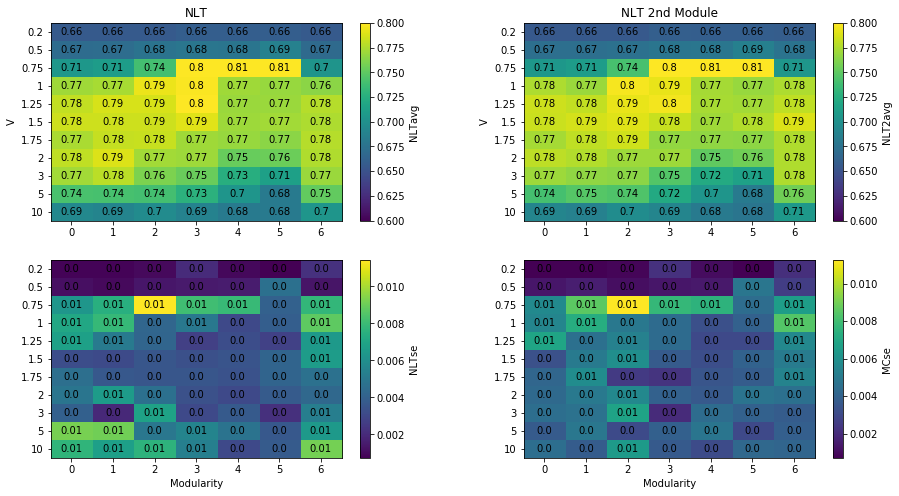

In [128]:
plt.rcParams['pdf.fonttype'] = 42

fig,axes=plt.subplots(2,2,figsize=(15,8))
fig.subplots_adjust(wspace=0.3)
ax=axes[0][0]
ax.set_title('NLT')
a=ax.imshow((dfmeanNLT_same),aspect='auto',vmin=0.6,vmax=0.8)
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(a,ax=ax,label='NLTavg')
for (j,i),label in np.ndenumerate(dfmeanNLT_same):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='k')

ax=axes[0][1]
ax.set_title('NLT 2nd Module')
b=ax.imshow(((dfmeanNLT2_same)),aspect='auto',vmin=0.6,vmax=0.8)
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(b,ax=ax,label='NLT2avg')
for (j,i),label in np.ndenumerate(dfmeanNLT2_same):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='k')
    
ax=axes[1][0]
b=ax.imshow((dfseNLT_same),aspect='auto')
ax.set_xlabel('Modularity')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(b,ax=ax,label='NLTse')
for (j,i),label in np.ndenumerate((dfseNLT_same)):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='k')
    
ax=axes[1][1]
b=ax.imshow((dfseNLT2_same),aspect='auto')
ax.set_xlabel('Modularity')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(b,ax=ax,label='MCse')
for (j,i),label in np.ndenumerate((dfseNLT2_same)):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='k')
    
# plt.savefig(saveFig+'NORMALIZED MultiTasking Performance ElecsSame vs DiffMod 300NWN 10nws SameAvgDegree.pdf',format='pdf',dpi=300)
# plt.savefig(saveFig+'Avg NORMALIZED MultiTasking - VSweep 300NWN 2Modules ElecInDiffModules SameAvgDeg 10sets REWIRED.pdf',format='pdf',dpi=300)

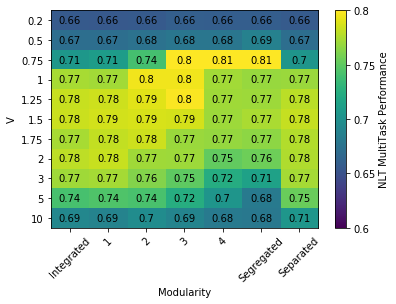

In [129]:
import matplotlib.colors
fig,ax=plt.subplots(1)
plt.imshow(np.abs(normalizedDifferenceNLT_NLT2_same),aspect='auto',cmap=plt.cm.viridis,vmin=0.6,vmax=0.8)
cb=plt.colorbar(label='NLT MultiTask Performance',ax=ax)
# cb.ax.invert_yaxis() 
cb.set_ticks(np.arange(0.6,0.8,step=0.05))
cb.set_ticklabels(np.around(np.arange(0.6,0.81,0.05),2))


ax=plt.gca()
ax.set_xticks(np.arange(0,7))
ax.set_xticklabels(['Integrated','1','2','3','4','Segregated','Separated'],rotation=45)
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
ax.set_xlabel('Modularity')
ax.set_ylabel('V')
for (j,i),label in np.ndenumerate(np.abs(normalizedDifferenceNLT_NLT2_same)):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='k')
    

plt.rcParams['pdf.fonttype'] = 42
# plt.savefig(saveFig+'Normalized Avg MultiTasking - VSweep 300NWN 2Modules ElecInEachModule SameAvgDeg 10 sets REWIRED.pdf',format='pdf',dpi=300)

In [133]:
NLT_sep=[[[] for j in range(len(graph))] for i in range(len(onAmp))]
NLT2_sep=[[[] for j in range(len(graph))] for i in range(len(onAmp))]

for volt in tqdm(range(len(onAmp))):
    for i in range(len(graph)):
        name=dataLoc+'NLT_ElectrodesSeparated_seed10_'+'2modules_Rewired_Network_'+str(i+1)+'_'+voltNames[volt]+'v.pkl'
        name2=dataLoc+'NLTx2_ElectrodesSeparated_seed10_'+'2modules_Rewired_Network_'+str(i+1)+'_'+voltNames[volt]+'v.pkl'
        NLT_sep[volt][i].append(decompress_pickle(name))
        NLT2_sep[volt][i].append(decompress_pickle(name2))

In [140]:
multiNLT=[[[] for j in range(len(graph))] for i in range(len(onAmp))]

for volt in tqdm(range(len(onAmp))):
    for i in range(len(graph)):
        for j in range(len(graph[0])):
            name=dataLoc+'NLT2+NLT_Electrodes_seed10_'+'REWIRED_'+str(i+1)+'_'+str(j+1)+'_'+voltNames[volt]+'v.pkl'
            multiNLT[volt][i].append(decompress_pickle(name))


In [146]:
def getWeightedGraph(sims,network,edgeList,numWires):#, this_TimeStamp = 0):
#     edgeList = network['edge_list']
    adjMat = np.zeros((numWires, numWires))
#     set_trace()
    adjMat[edgeList[:,0], edgeList[:,1]] = sims['JunctionConductance'][-1]#network.junctionSwitch[this_TimeStamp,:] #CHANGE THIS TO CONDUCTANCE THRESHOLD?
    adjMat[edgeList[:,1], edgeList[:,0]] = sims['JunctionConductance'][-1]#network.junctionSwitch[this_TimeStamp,:] #CHANGE THIS TO CONDUCTANCE THRESHOLD?
    WeightedGraph = nx.from_numpy_array(adjMat)
    WeightedGraph=nx.DiGraph.to_undirected(WeightedGraph)
    
    return WeightedGraph

In [157]:
nwnum=1

sources=[[] for i in range(len(onAmp))]
drains=[[] for i in range(len(onAmp))]
weightedSubGraph=[[] for i in range(len(onAmp))]
for volt in tqdm(range(len(graph))): #for each voltage
    for mod in range(len(graph[0])): #for each module
        sim=multiNLT[volt][nwnum][mod]
        network=np.array(nx.adjacency_matrix(graph[nwnum][mod]).todense()) #use sample network to show functional graph
        sources[volt].append(sim['Source'])
        drains[volt].append(sim['Drain'])
        OGgraph=graph[nwnum][mod].copy()
        pos=nx.kamada_kawai_layout(OGgraph)
        numWires=graph[nwnum][mod].number_of_nodes()
        sim['JunctionResistance']=1/sim['JunctionConductance'][-1]
        edgeList=np.array(list(graph[nwnum][mod].edges()))
#         subGraph=getOnGraph(sim,network,edgeList,numWires)
        weightedSubGraph[volt].append(getWeightedGraph(sim,network,edgeList,numWires))

In [158]:
weights1=[]
for i in tqdm(range(len(weightedSubGraph))): #for each voltage
    for j in range(len(weightedSubGraph[i])):#For each network
        G=weightedSubGraph[i][j]
        edges=G.edges()
        weights1.append([G[u][v]['weight'] for u,v in edges])

In [165]:
len(weightedSubGraph[0])

6

In [159]:
minWeights=np.min(np.hstack(weights1))
maxWeights=np.max(np.hstack(weights1))

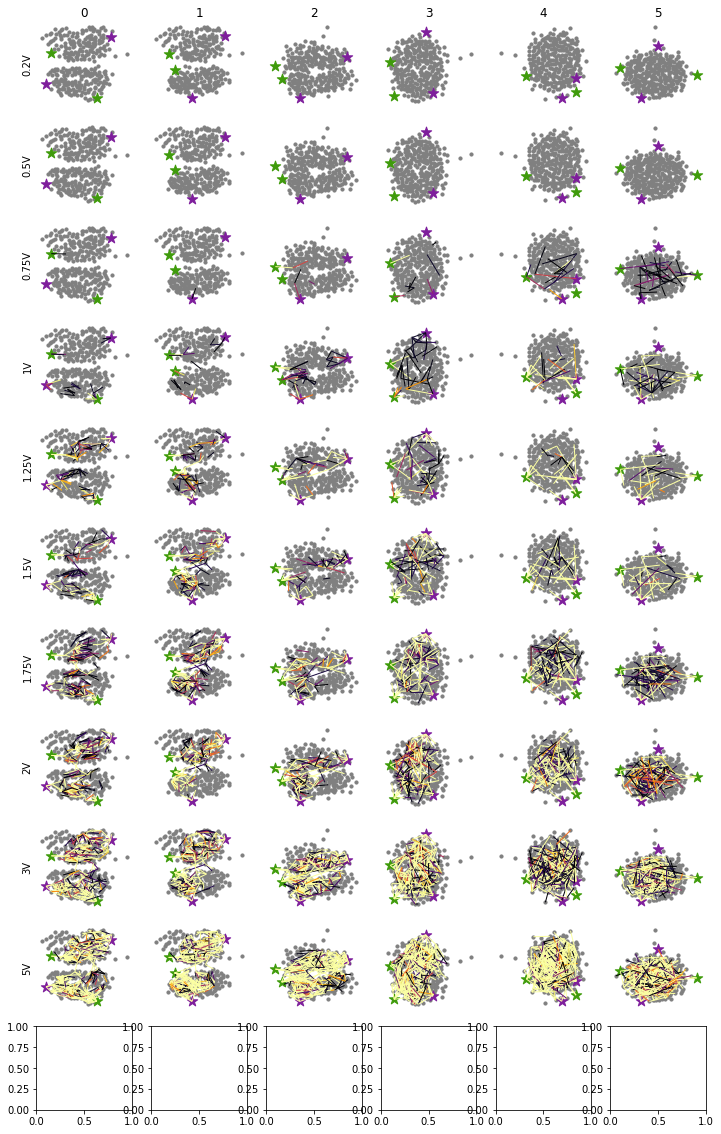

In [169]:
#### PLOT SUBGRAPHS + CURRENT OVERLAY
#Max NLT
fig, axes = plt.subplots(11,len(weightedSubGraph[0]),figsize=(12,20))
for i in tqdm(range(len(weightedSubGraph))): #for each voltage
    for j in range(len(weightedSubGraph[i])):#For each network
            #find top + bottom network
        ax=axes[i][j]
        G=weightedSubGraph[i][j]#current_new[i][j][maxNW]
        edge_weights=nx.get_edge_attributes(G,'weight')
        G.remove_edges_from((e for e, w in edge_weights.items() if w <1e-6)) 
        edges=G.edges()
        weights=[G[u][v]['weight'] for u,v in edges]
        
        OGgraph=graph[nwnum][j]
        #draw OG graph
        pos=nx.kamada_kawai_layout(OGgraph)
        h=nx.draw_networkx_nodes(OGgraph,pos=pos,node_color='grey',node_size=10,ax=ax)
        h.set_zorder(1)

        if j == 0:
            ax.set_ylabel(str(np.around(onAmp[i],2))+'V')
        if i == 0:
            ax.set_title(range(6)[j])
        h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color=weights,edge_cmap=plt.cm.inferno,edge_vmin=minWeights,edge_vmax=maxWeights)
    
        if h2:
            h2.set_norm(clrs.SymLogNorm(10))
            h2.set_zorder(3)
#             if j == 10 and i == 6:
#                 plt.colorbar(h2)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=sources[i][j],node_color='#3f9b0b',node_size=120,node_shape ='*',ax=ax)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=drains[i][j],node_color='#7e1e9c',node_size=120,node_shape ='*',ax=ax)
        ax.set_frame_on(False)
           
#         ax.annotate('NLT = '+"{0:.2f}".format(NLT_same[j][i]),xy=(0.5,1),xycoords='axes fraction')
#         ax.annotate('MC = '+"{0:.2f}".format(MC_same[j][i]),xy=(0.5,0.9),xycoords='axes fraction')
        
        ax.set_yticks([])
        ax.set_xticks([])

    plt.savefig(saveFig+'VSweep 300NWN SameAvgDeg 2Modules NLT+NLT - Conductance Graphs MultiTasking'+str(nwnum)+'.pdf',format='pdf',dpi=300)